<h1 style="background-color:red;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Classification of Different Tech Feild Using NLP</h1>


# Here the provided data is about the Technology in which a company is work. As the company Root2AI focus on providing Tech solution to company. This dataset seems to have a lots of potential to provide solution to companies. We could use this classification model for building a chatbot which provides customized introduction message to customer.

# For example if a customer need web-services and when they interact with the company this model would help bot to understand what customer needs and then chat bot would text or email the customer with information technology company is working and emphasizing the works company did in web-services

<h1 style="background-color:#00ff56;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Different Libraries used </h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.layers import Embedding,LSTM,Dense,Input,SimpleRNN,GRU
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,TerminateOnNaN
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import GlobalMaxPooling1D
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
!pip install pyspellchecker
from spellchecker import SpellChecker
import pickle
warnings.filterwarnings('ignore')

     |████████████████████████████████| 2.7 MB 2.8 MB/s eta 0:00:01


In [2]:

data=pd.read_csv('../input/root2ai/root2ai - Data.csv')
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


## Few null values are there in Text column so droping it

In [4]:
data.dropna(inplace=True)

In [5]:
data.Target.value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

### After a through look at dataset i realized that there is a great problem with dataset.i,e. some of the Texts are just few words and that also a very common word that even the human can't categoried it. So i have selected a threshold of 4 words if texts have less than 4 word we can simply drop them as they can be considered as outliers.


In [6]:
def remove_short_text(texts):
    words=texts.split()
    if len(words)<=3:
        return None
    else:
        return texts

data.Text=data.Text.apply(remove_short_text)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22701 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    18708 non-null  object
 1   Target  22701 non-null  object
dtypes: object(2)
memory usage: 532.1+ KB


In [8]:
data.dropna(inplace=True)

<h3 style="background-color:#dfff56;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 10px;padding: 5px">As there could be spelling mistake in dataset so lets correct it!! </h3>

In [9]:

spellChecker=SpellChecker()
def correct_text_spelling(text):
    corrected_text=[]
    misspelled_words = spellChecker.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spellChecker.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

data.Text=data.Text.apply(correct_text_spelling)

In [10]:
data.Text[1]

'director could play role financial system'

### For uniform data-spliting among train and test dataset we use stratifiedShuffleSplit.

In [11]:

split=StratifiedShuffleSplit(test_size=0.15,random_state=42)
for train_index,test_index in split.split(data,data['Target']):
    train_data=data.iloc[train_index]
    test_data=data.iloc[test_index]

In [12]:
train_data.shape

(15901, 2)

In [13]:
test_data.shape

(2807, 2)

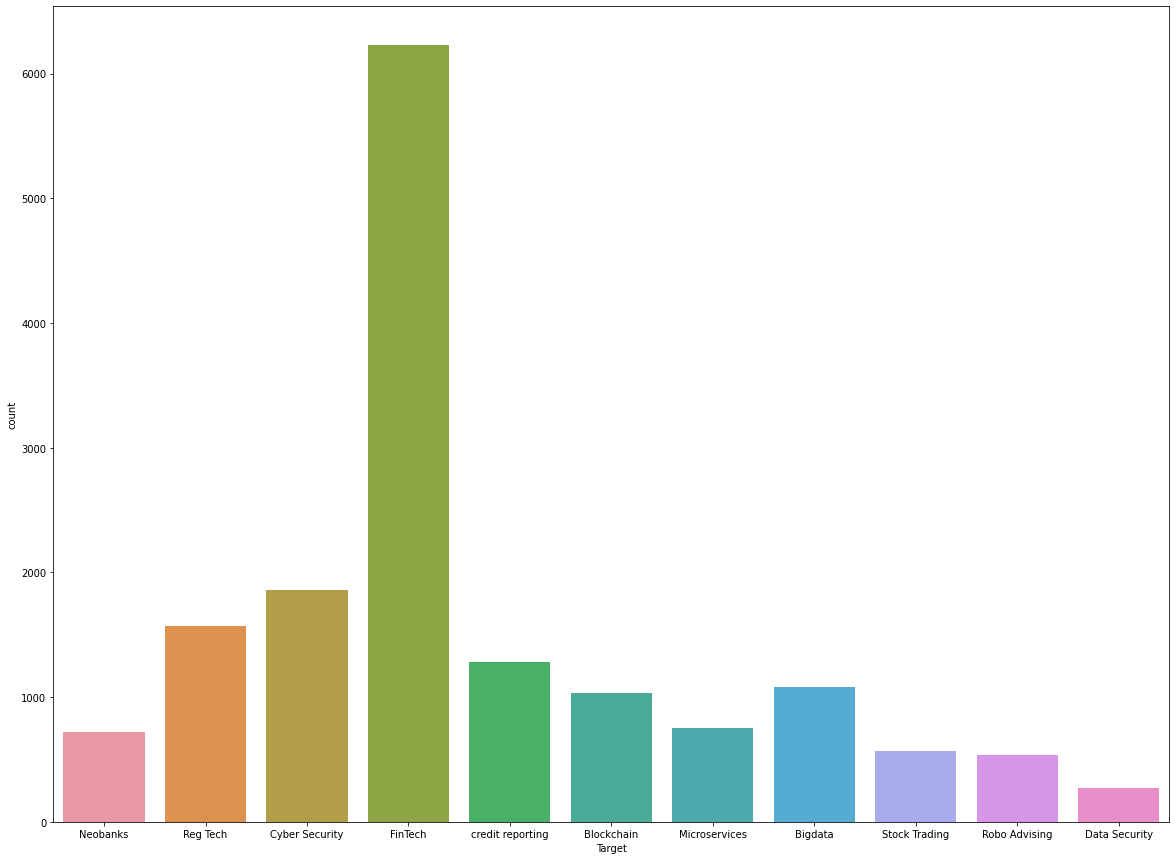

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(train_data.Target)
plt.show()

## From above it is quite evident that FinTech dataset is most used in the model

[]

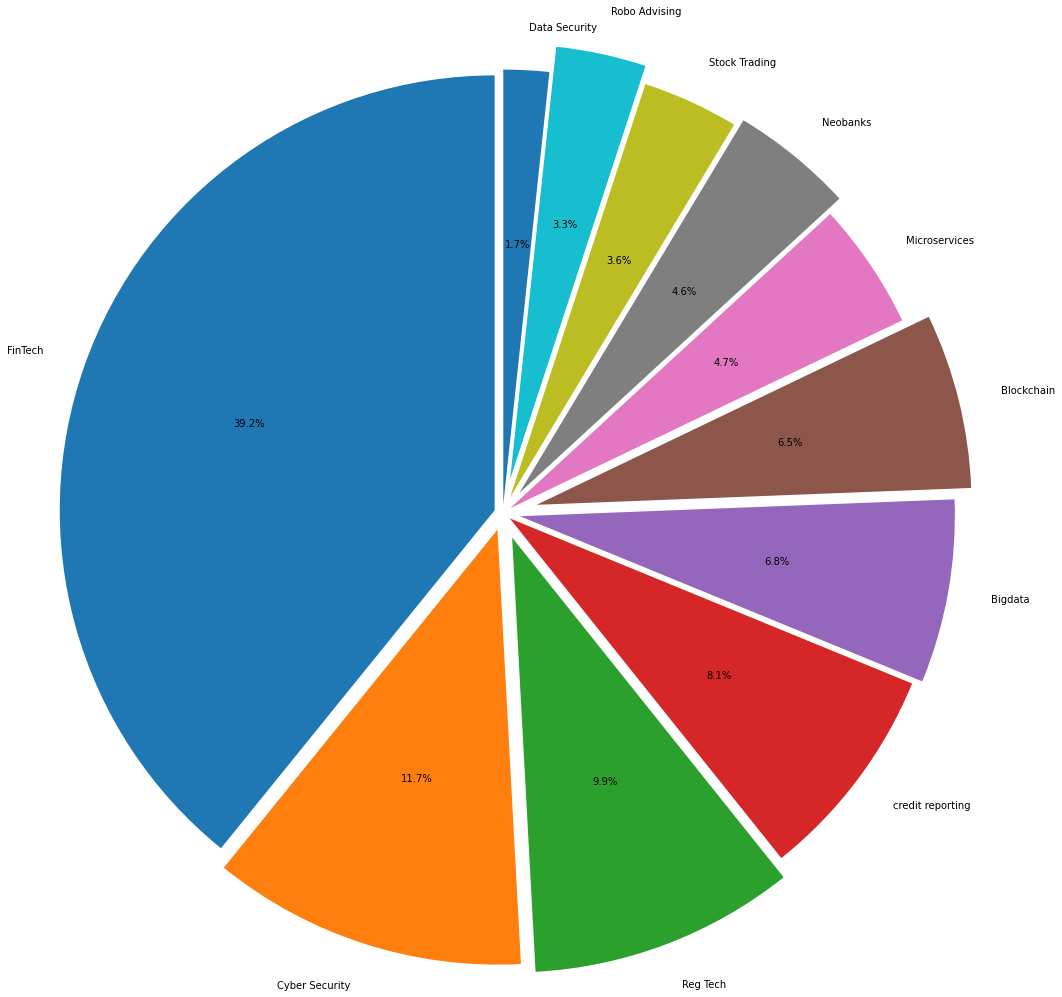

In [15]:
plt.pie(train_data.Target.value_counts(),explode=[0.1,0.2,0.3,0.1,0.2,0.4,0.1,0.3,0.2,0.4,0.1],autopct='%0.1f%%',labels=train_data.Target.value_counts().index,radius=5,startangle=90)
plt.plot()


## Analysising top 4 most occuring technology

In [16]:
train_data['Text'][train_data.Target=='FinTech'][1:10].values

array(['example combined regula tory compliance often',
       'considerable capital ample customer bases',
       'possibility combining open selection best best financial roof',
       'until trading goods goods limited small community direct',
       'billion people financial system doubt enormous',
       'their platform designed digital enrolment user experience analogue process branch',
       'mobile challenge approach banking innovation competition',
       'innovation against backdrop innovation investment continued growth private sector',
       'payment method charge user making payment merchant'], dtype=object)

In [17]:
train_data['Text'][train_data.Target=='Bigdata'][1:10].values

array(['modern customer support tools provide wide variety data concerning user requests timelines resolution customer problems',
       'emerging markets primary beneficiaries seldom established credit registry',
       'according estimate third globally stored information form alphanumeric text still image data format useful data applications',
       'since metadata added unstructured data types including son avro',
       'world technological capita capacity store information roughly doubled every months since every',
       'results research used product process improvements business',
       'methodology addresses handling data terms useful permutations data sources complexity interrelationship difficulty deleting modifying individual records',
       'this company recently suffered series defaults',
       'suggested nick couldrt joseph throw practitioners media advertising approach data many actionable points information millions individuals'],
      dtype=object)

In [18]:
train_data['Text'][train_data.Target=='Cyber Security'][:10].values

array(['easily access research mobile capitalize investment quickly banking mobile banking track investment',
       'report assessment payment prone suffer higher exposure',
       'boundary sandbox evaluation criteria after period duration sandbox differ case case basis',
       'this ethical financial dealing currency unable fully verify identity',
       'original bill prepared committee government',
       'must remain impossible completely secure technology',
       'after vehemently breach backed following statement',
       'financial sector include banking payment',
       'addition sole operator mobile application recently national common mobility card card scheme',
       'domestic standard setting testing component resilience'],
      dtype=object)

In [19]:
train_data['Text'][train_data.Target=='Reg Tech'][:10].values

array(['fact caused reevaluation regulatory approaches China',
       'Hannah Augur Regtech Buzzword Turning Heads DATACONOMY dataconomy',
       'Additionally FSOC issue recommendations primary financial regulatory agencies apply heightened standards financial activity practice conducted companies predominantly engaged financial activities',
       'Today course majority securities trading involves computers example Herstatt risk cross currency settlement risk Long Dark Shadow Herstatt ECONOMIST April',
       'example introduction deposit insurance scheme China provide safety allowing potential failure banks',
       'Enhancing Corporate Governance RegTech promotes good corporate practice compliance manage ment enhances desired regulatory compliance outcomes',
       'vision builds Andy Haldane whereby financial institutions regulators monitor analyze real time financial information parts global financial sector underpin safer efficient financial system',
       'This includes test d

In [20]:
class Lemmatizer():
    def __init__(self):
        self.lemmatizer=WordNetLemmatizer()
    def __call__(self,sentence):
        sentence=re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ',sentence)
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if word not in stopwords.words('english') if len(self.lemmatizer.lemmatize(word))>1]

In [21]:
token=Tokenizer(num_words=3000,oov_token=Lemmatizer())

In [22]:
token.fit_on_texts(train_data.Text)

In [23]:
# token.word_index

In [24]:
p=sorted(token.word_counts.items(), key=lambda item : item[1],reverse=True)
df=pd.DataFrame(columns=['word','count'])
i=1
for k,v in p:
    df2=pd.DataFrame({'word':[k],'count':[v]})
    df=df.append(df2)
    if i==50:
        break
    i+=1

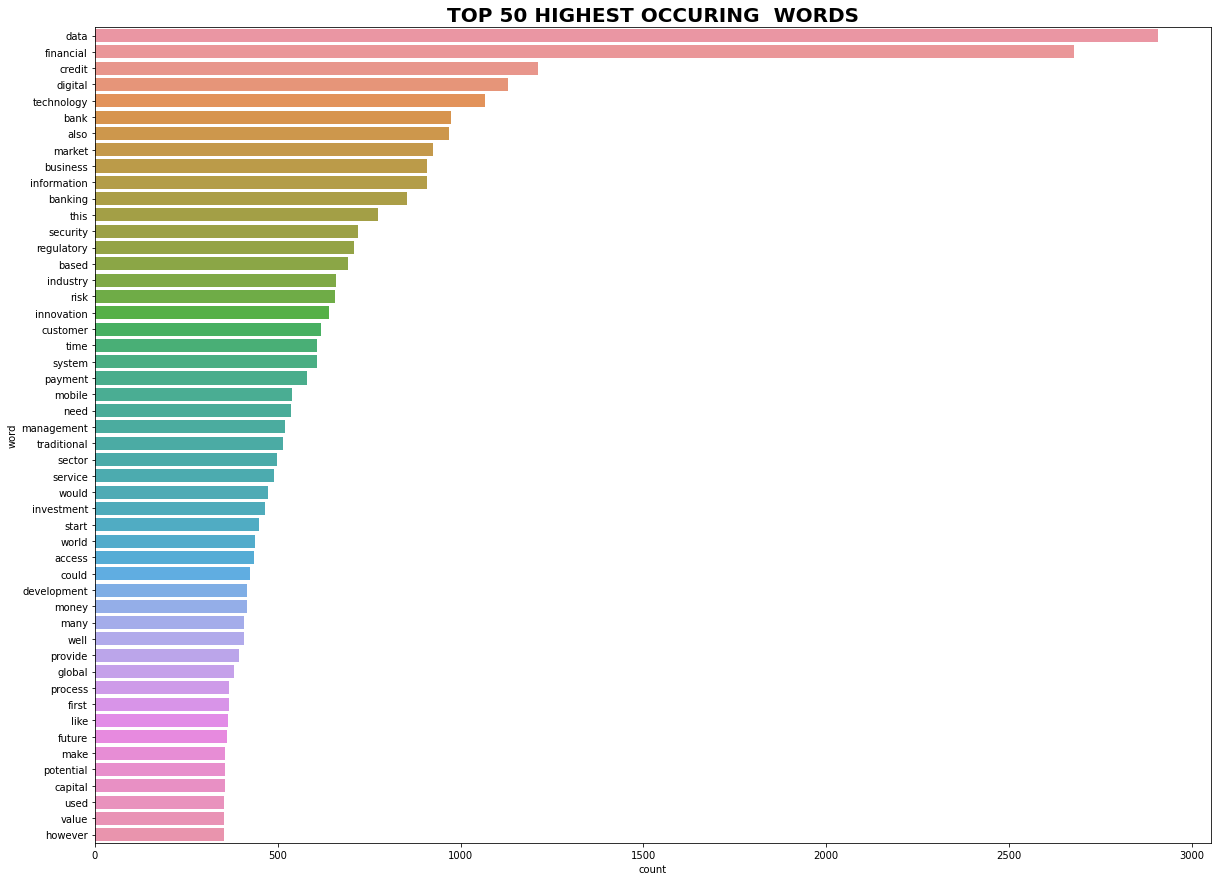

In [25]:
plt.figure(figsize=(20,15))
sns.barplot(df['count'],df['word'])
plt.title('TOP 50 HIGHEST OCCURING  WORDS',fontdict={'size':20,'weight':'bold'})
plt.show()

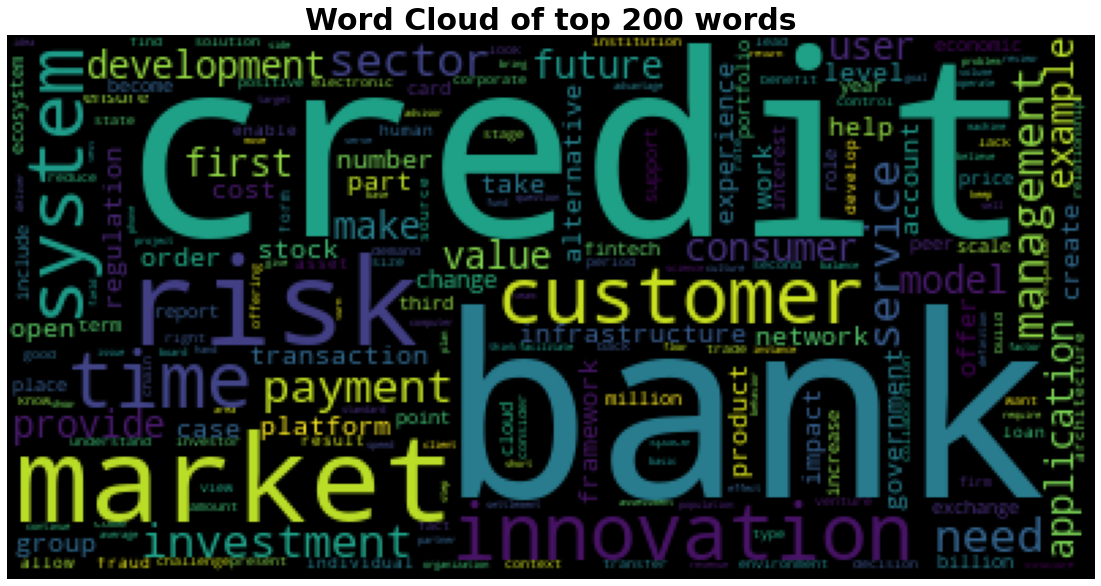

In [26]:
wc=WordCloud()
wc.generate(' '.join(word for i,word in enumerate(token.word_index.keys()) if i>1))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud of top 200 words',fontdict={'size':30,'weight':'bold'})
plt.imshow(wc)

In [27]:
train_text=token.texts_to_sequences(train_data.Text)

In [28]:
train_text_padded=pad_sequences(train_text,maxlen=30,padding='post',truncating='pre')

In [29]:
lbl_encoder=LabelEncoder()
train_target=lbl_encoder.fit_transform(train_data.Target)

In [30]:
val_text=token.texts_to_sequences(test_data.Text)
val_text_padded=pad_sequences(val_text,maxlen=30,padding='post',truncating='pre')
val_target=lbl_encoder.transform(test_data.Target)

In [31]:
V=len(token.word_index)

<h2 style="background-color:#00ff56;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Creating Callback function </h2>


In [32]:
early_stop=EarlyStopping(patience=6)
reduceLR=ReduceLROnPlateau(patience=4)

In [33]:
import tensorflow as tf

In [34]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

## Creating simple LSTM model with 3 Dense layers and a dropout layer

In [36]:
embedding_feature=32
with tpu_strategy.scope():
    model1=Sequential()
    model1.add(Embedding(V+1,embedding_feature,input_shape=(30,)))
    model1.add(keras.layers.Bidirectional(LSTM(64,dropout=0.2)))
    model1.add(Dense(512,activation='relu'))
    model1.add(keras.layers.Dropout(0.2))
    model1.add(Dense(128,activation='relu'))
    model1.add(Dense(11,activation='softmax'))
    # model.add()

In [37]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
r=model1.fit(train_text_padded,train_target,validation_data=(val_text_padded,val_target),epochs=100,batch_size=50,callbacks=[early_stop,reduceLR])

Epoch 1/100
319/319 [==============================] - 16s 29ms/step - loss: 1.9586 - accuracy: 0.4032 - val_loss: 1.5049 - val_accuracy: 0.5155
Epoch 2/100
319/319 [==============================] - 6s 18ms/step - loss: 1.3809 - accuracy: 0.5568 - val_loss: 1.3061 - val_accuracy: 0.5867
Epoch 3/100
319/319 [==============================] - 6s 18ms/step - loss: 1.1582 - accuracy: 0.6338 - val_loss: 1.2310 - val_accuracy: 0.6156
Epoch 4/100
319/319 [==============================] - 6s 18ms/step - loss: 1.0138 - accuracy: 0.6743 - val_loss: 1.1828 - val_accuracy: 0.6266
Epoch 5/100
319/319 [==============================] - 6s 18ms/step - loss: 0.8886 - accuracy: 0.7164 - val_loss: 1.1595 - val_accuracy: 0.6352
Epoch 6/100
319/319 [==============================] - 6s 18ms/step - loss: 0.7999 - accuracy: 0.7438 - val_loss: 1.1796 - val_accuracy: 0.6320
Epoch 7/100
319/319 [==============================] - 6s 18ms/step - loss: 0.7206 - accuracy: 0.7638 - val_loss: 1.2074 - val_accuracy

In [54]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 32)            322624    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1419      
Total params: 505,419
Trainable params: 505,419
Non-trainable params: 0
________________________________________________

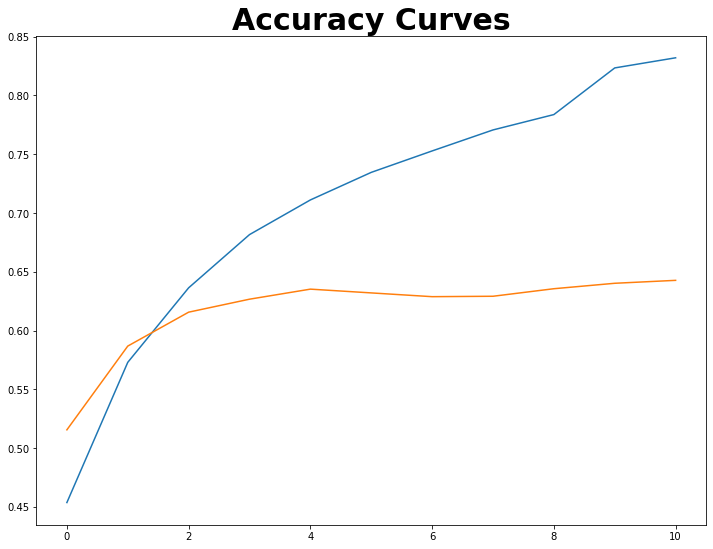

In [39]:
plt.figure(figsize=(12,9))
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Accuracy Curves',fontdict={'size':30,'weight':'bold'})
plt.show()

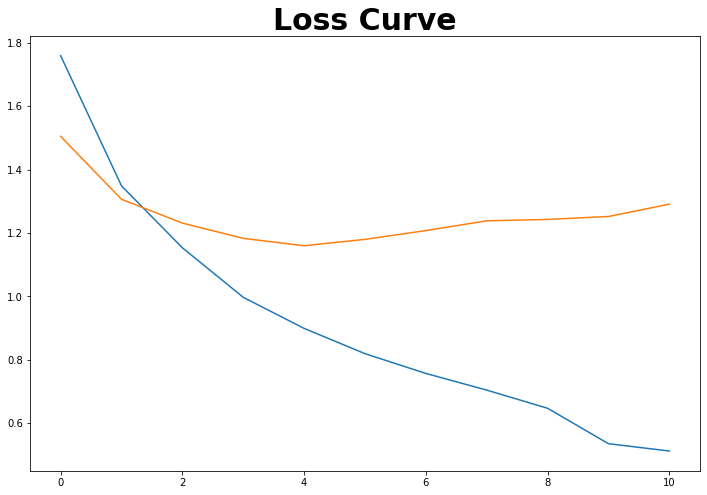

In [40]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Loss Curve',fontdict={'size':30,'weight':'bold'})
plt.show()

In [41]:
print('model 1 train',classification_report(train_target,model1.predict_classes(train_text_padded)))
print('model 1 test',classification_report(val_target,model1.predict_classes(val_text_padded)))

model 1 train               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1084
           1       0.89      0.86      0.88      1033
           2       0.82      0.77      0.80      1859
           3       0.68      0.31      0.43       269
           4       0.83      0.92      0.87      6228
           5       0.91      0.84      0.88       750
           6       0.80      0.56      0.66       724
           7       0.97      0.95      0.96      1570
           8       0.83      0.74      0.78       532
           9       0.90      0.83      0.87       569
          10       0.86      0.86      0.86      1283

    accuracy                           0.86     15901
   macro avg       0.85      0.78      0.81     15901
weighted avg       0.86      0.86      0.85     15901

model 1 test               precision    recall  f1-score   support

           0       0.69      0.74      0.72       191
           1       0.49      0.49      0.49       1

<h2 style="background-color:#00ffff;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Here we could see that the model is overfit so lets try another approach of building model.</h2>


## Creating a LSTM model with 3 dense layer and GlobalMaxPooling1D with SGD optimizer

In [88]:
embedding_feature=32

with tpu_strategy.scope():
    model2=Sequential()
    model2.add(Embedding(V+1,embedding_feature,input_shape=(30,)))
    model2.add(keras.layers.Bidirectional(LSTM(64,return_sequences=True,dropout=0.1,recurrent_dropout=0.1)))
    model2.add(GlobalMaxPooling1D())
    model1.add(keras.layers.Dropout(0.2))
    model2.add(Dense(512,activation='relu'))
    model1.add(keras.layers.Dropout(0.2))
    model2.add(Dense(128, activation='relu'))
    model2.add(Dense(11,activation='softmax'))
# model.add()

In [89]:

model2.compile(optimizer=keras.optimizers.SGD(0.1,0.09),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r2=model2.fit(train_text_padded,train_target,validation_data=(val_text_padded,val_target),
              epochs=20,callbacks=[early_stop,reduceLR],batch_size=50 )

Epoch 1/20
319/319 [==============================] - 19s 33ms/step - loss: 2.0389 - accuracy: 0.3822 - val_loss: 1.9988 - val_accuracy: 0.3915
Epoch 2/20
319/319 [==============================] - 6s 20ms/step - loss: 1.9897 - accuracy: 0.3915 - val_loss: 1.9454 - val_accuracy: 0.3986
Epoch 3/20
319/319 [==============================] - 6s 19ms/step - loss: 1.9244 - accuracy: 0.4050 - val_loss: 1.9047 - val_accuracy: 0.4019
Epoch 4/20
319/319 [==============================] - 6s 20ms/step - loss: 1.8683 - accuracy: 0.4201 - val_loss: 1.9031 - val_accuracy: 0.4229
Epoch 5/20
319/319 [==============================] - 6s 20ms/step - loss: 1.7814 - accuracy: 0.4491 - val_loss: 1.7171 - val_accuracy: 0.4756
Epoch 6/20
319/319 [==============================] - 6s 20ms/step - loss: 1.6742 - accuracy: 0.4829 - val_loss: 1.5873 - val_accuracy: 0.5105
Epoch 7/20
319/319 [==============================] - 6s 20ms/step - loss: 1.5627 - accuracy: 0.5168 - val_loss: 1.7625 - val_accuracy: 0.432

In [90]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 30, 32)            322624    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 30, 128)           49664     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_24 (Dense)             (None, 11)                1419      
Total params: 505,419
Trainable params: 505,419
Non-trainable params: 0
_______________________________________________

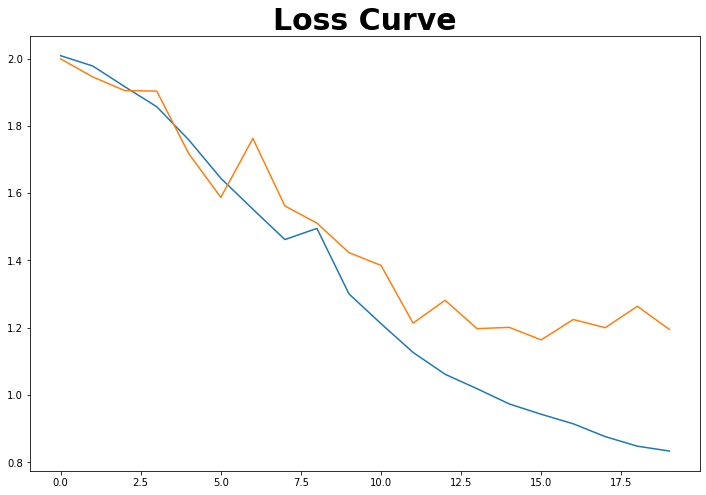

In [91]:
plt.figure(figsize=(12,8))
plt.plot(r2.history['loss'])
plt.plot(r2.history['val_loss'])
plt.title('Loss Curve',fontdict={'size':30,'weight':'bold'})
plt.show()

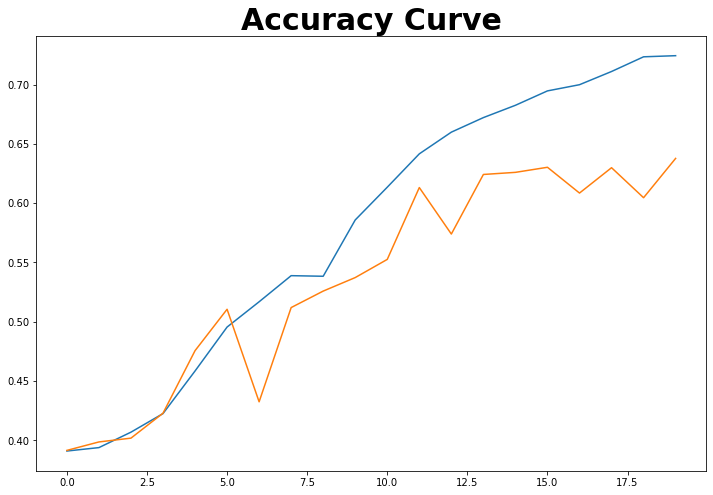

In [92]:
plt.figure(figsize=(12,8))
plt.plot(r2.history['accuracy'])
plt.plot(r2.history['val_accuracy'])
plt.title('Accuracy Curve',fontdict={'size':30,'weight':'bold'})
plt.show()

In [93]:
print('model 2 train',classification_report(train_target,model2.predict_classes(train_text_padded)))
print('model 2 test',classification_report(val_target,model2.predict_classes(val_text_padded)))

model 2 train               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1084
           1       0.87      0.59      0.70      1033
           2       0.68      0.72      0.70      1859
           3       0.40      0.04      0.07       269
           4       0.70      0.93      0.80      6228
           5       0.84      0.70      0.76       750
           6       0.90      0.01      0.02       724
           7       0.91      0.93      0.92      1570
           8       0.75      0.43      0.55       532
           9       0.82      0.72      0.77       569
          10       0.85      0.64      0.73      1283

    accuracy                           0.76     15901
   macro avg       0.78      0.59      0.63     15901
weighted avg       0.77      0.76      0.73     15901

model 2 test               precision    recall  f1-score   support

           0       0.78      0.64      0.70       191
           1       0.65      0.35      0.46       1

<h2 style="background-color:#00ffff;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Here the problem of overfitting is solved but  we can see that our model doesn't work well on predicting class 3 as number of data is insufficient.</h2>


## Creating a GRU model with SGD optimizer and SpatialDropout1D

In [71]:

embedding_feature=64

with tpu_strategy.scope():
    model3=Sequential()
    model3.add(Embedding(V+1,embedding_feature,input_shape=(30,)))
    model3.add(keras.layers.SpatialDropout1D(0.2))
    model3.add(GRU(20))
    model3.add(Dense(11,activation='softmax'))
    # model.add()

In [72]:

model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r3=model3.fit(train_text_padded,train_target,validation_data=(val_text_padded,val_target),epochs=100,batch_size=50,callbacks=[early_stop])

Epoch 1/100
319/319 [==============================] - 12s 25ms/step - loss: 2.1170 - accuracy: 0.3586 - val_loss: 1.9849 - val_accuracy: 0.3926
Epoch 2/100
319/319 [==============================] - 6s 18ms/step - loss: 1.8664 - accuracy: 0.4250 - val_loss: 1.6083 - val_accuracy: 0.4884
Epoch 3/100
319/319 [==============================] - 6s 18ms/step - loss: 1.5166 - accuracy: 0.5034 - val_loss: 1.5030 - val_accuracy: 0.5069
Epoch 4/100
319/319 [==============================] - 6s 18ms/step - loss: 1.3807 - accuracy: 0.5555 - val_loss: 1.4416 - val_accuracy: 0.5422
Epoch 5/100
319/319 [==============================] - 6s 18ms/step - loss: 1.2544 - accuracy: 0.6010 - val_loss: 1.3583 - val_accuracy: 0.5835
Epoch 6/100
319/319 [==============================] - 6s 18ms/step - loss: 1.1073 - accuracy: 0.6554 - val_loss: 1.2961 - val_accuracy: 0.6049
Epoch 7/100
319/319 [==============================] - 6s 18ms/step - loss: 0.9966 - accuracy: 0.6896 - val_loss: 1.2852 - val_accuracy

In [73]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 30, 64)            645248    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 30, 64)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 20)                5160      
_________________________________________________________________
dense_21 (Dense)             (None, 11)                231       
Total params: 650,639
Trainable params: 650,639
Non-trainable params: 0
_________________________________________________________________


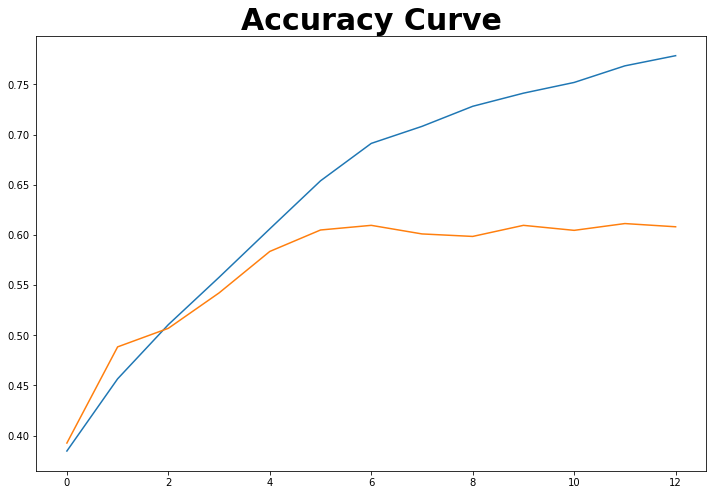

In [74]:
plt.figure(figsize=(12,8))
plt.plot(r3.history['accuracy'])
plt.plot(r3.history['val_accuracy'])
plt.title('Accuracy Curve',fontdict={'size':30,'weight':'bold'})
plt.show()

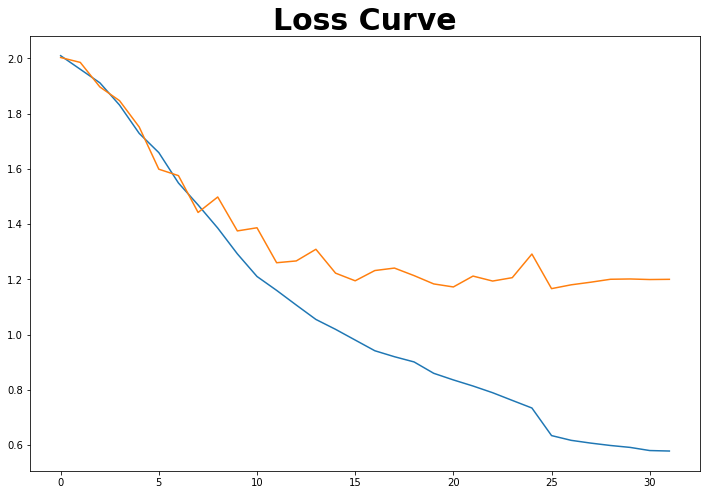

In [75]:
plt.figure(figsize=(12,8))
plt.plot(r2.history['loss'])
plt.plot(r2.history['val_loss'])
plt.title('Loss Curve',fontdict={'size':30,'weight':'bold'})
plt.show()

In [76]:
print('model 3 train',classification_report(train_target,model3.predict_classes(train_text_padded)))
print('model 3 test',classification_report(val_target,model3.predict_classes(val_text_padded)))

model 3 train               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1084
           1       0.58      0.74      0.65      1033
           2       0.77      0.89      0.83      1859
           3       0.50      0.00      0.01       269
           4       0.82      0.95      0.88      6228
           5       0.72      0.69      0.70       750
           6       0.60      0.01      0.02       724
           7       0.96      0.94      0.95      1570
           8       0.50      0.04      0.07       532
           9       0.89      0.80      0.85       569
          10       0.85      0.87      0.86      1283

    accuracy                           0.81     15901
   macro avg       0.74      0.62      0.61     15901
weighted avg       0.79      0.81      0.78     15901

model 3 test               precision    recall  f1-score   support

           0       0.72      0.69      0.70       191
           1       0.35      0.38      0.36       1

<h2 style="background-color:#00ffff;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 10px;padding: 5px">The above model doesn't worked well so let's try simple logistic regression.</h2>


<h4 style="background-color:#00ff56;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Trying Simple Neural Network or Logistic Regresion Prediction</h4>


In [77]:
counter=CountVectorizer(max_features=5000,tokenizer=Lemmatizer(),min_df=4,max_df=0.5)
train_text_seq=counter.fit_transform(train_data.Text).toarray()

In [78]:
feature_names=counter.get_feature_names()

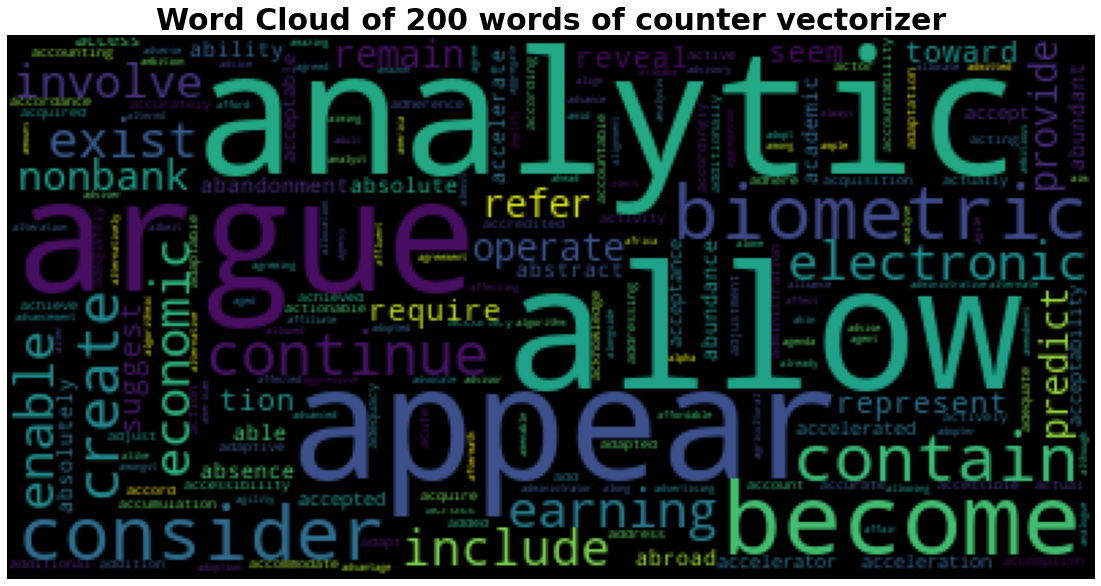

In [79]:
wc_counter=WordCloud()
wc_counter.generate(' '.join(word for word in feature_names))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud of 200 words of counter vectorizer',fontdict={'size':30,'weight':'bold'})
plt.imshow(wc_counter)

In [80]:
test_text_seq=counter.transform(test_data.Text).toarray()

In [81]:
model4=LogisticRegression(max_iter=5000)
model4.fit(train_text_seq,train_target)

LogisticRegression(max_iter=5000)

In [82]:
print('model 4 train',classification_report(train_target,model4.predict(train_text_seq)))
print('model 4 test',classification_report(val_target,model4.predict(test_text_seq)))

model 4 train               precision    recall  f1-score   support

           0       0.94      0.87      0.90      1084
           1       0.93      0.81      0.87      1033
           2       0.88      0.77      0.82      1859
           3       0.95      0.61      0.75       269
           4       0.80      0.96      0.87      6228
           5       0.97      0.82      0.88       750
           6       0.92      0.66      0.77       724
           7       0.97      0.93      0.95      1570
           8       0.92      0.77      0.84       532
           9       0.96      0.81      0.88       569
          10       0.92      0.82      0.87      1283

    accuracy                           0.87     15901
   macro avg       0.92      0.80      0.85     15901
weighted avg       0.88      0.87      0.87     15901

model 4 test               precision    recall  f1-score   support

           0       0.72      0.61      0.66       191
           1       0.66      0.46      0.54       1

In [83]:
lbl_encoder.classes_

array(['Bigdata', 'Blockchain', 'Cyber Security', 'Data Security',
       'FinTech', 'Microservices', 'Neobanks', 'Reg Tech',
       'Robo Advising', 'Stock Trading', 'credit reporting'], dtype=object)

In [86]:
from sklearn.naive_bayes import MultinomialNB
model5=MultinomialNB()
model5.fit(train_text_seq,train_target)

MultinomialNB()

In [87]:
print('model 5 train',classification_report(train_target,model5.predict(train_text_seq)))
print('model 5 test',classification_report(val_target,model5.predict(test_text_seq)))

model 5 train               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1084
           1       0.78      0.70      0.74      1033
           2       0.72      0.67      0.70      1859
           3       0.77      0.36      0.49       269
           4       0.74      0.85      0.79      6228
           5       0.82      0.73      0.77       750
           6       0.79      0.50      0.61       724
           7       0.85      0.85      0.85      1570
           8       0.73      0.62      0.67       532
           9       0.77      0.72      0.74       569
          10       0.78      0.75      0.77      1283

    accuracy                           0.76     15901
   macro avg       0.78      0.68      0.72     15901
weighted avg       0.77      0.76      0.76     15901

model 5 test               precision    recall  f1-score   support

           0       0.65      0.65      0.65       191
           1       0.66      0.53      0.59       1

<h2 style="background-color:#00ff56;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Model Selection conclusion</h2>


# Best accuracy we obtained is for MultinomialNB model.We could use this model for production purpose as accuracy for each class is better than that of other model.And the model is not overfitted too. Through model obtained a good accuracy but accuracy in prediction of data security and Robo-Advising is less , as there are not sufficient data of this two instances. This could be considered as disadvantage of this model

<h2 style="background-color:#00ff56;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Dumping the best model for further use </h2>

In [ ]:
with open('log_model.pickle','wb') as handle:
    pickle.dump(model4,handle,protocol=pickle.HIGHEST_PROTOCOL)

with open('log_tokenizer.pickle','wb') as handle:
    pickle.dump(counter,handle,protocol=pickle.HIGHEST_PROTOCOL)

with open('log_encoder.pickle','wb') as handle:
    pickle.dump(lbl_encoder,handle,protocol=pickle.HIGHEST_PROTOCOL)